In [1]:
import pandas as pd
import numpy as np

In [2]:
drugs = pd.read_csv('Drug_Category_Survey/Drug_Category_Survey.csv')

In [3]:
drugs.head()

,DrugID,DrugName,DrugCategoryAlphabet,SurveyRatings
0,60,XANAX,A1,3
1,148,PROPRANOLO,A1,3
2,210,EXTAVIA,A1,5
3,417,VICTOZA 3-,A1,4
4,429,LAMICTAL,A1,4


In [4]:
customers = pd.read_csv('Customers/Customers.csv')

In [5]:
customers.shape

(2000, 4)

In [6]:
customers.head()

,CustomerID,Gender,Age,AnnualIncome
0,1,Male,19,15000
1,2,Male,21,35000
2,3,Female,20,86000
3,4,Female,23,59000
4,5,Female,31,38000


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    2000 non-null   int64 
 1   Gender        2000 non-null   object
 2   Age           2000 non-null   int64 
 3   AnnualIncome  2000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 62.6+ KB


In [8]:
customers.describe()

,CustomerID,Age,AnnualIncome
count,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500
std,577.494589,28.429747,45739.536688
min,1.000000,0.000000,0.000000
25%,500.750000,25.000000,74572.000000
50%,1000.500000,48.000000,110045.000000
75%,1500.250000,73.000000,149092.750000
max,2000.000000,99.000000,189974.000000


In [9]:
customers['Age'].value_counts(normalize=True).reset_index()

,index,Age
0,31,0.0155
1,32,0.0150
2,52,0.0150
3,91,0.0145
4,63,0.0140
...,...,...
95,42,0.0060
96,10,0.0060
97,77,0.0060
98,71,0.0060


In [10]:
customers['Age'].min()

0

In [2]:
drug_21 = pd.read_csv('StateDrugUtilization2021/StateDrugUtilization2021.csv')

In [3]:
drug_21.head()

,state,ndc,labeler_code,product_code,unity_qty,DateINT,Date,product_name,CustomerID,customer_rating
0,AK,2143380,2,1433,80,1,1/1/2021,TRULICITY,30,2
1,AK,2143480,2,1434,80,206,7/25/2021,TRULICITY,14,1
2,AK,2143611,2,1436,11,302,10/29/2021,EMGALITY P,4,3
3,AK,2144511,2,1445,11,203,7/22/2021,TALTZ AUTO,7,5
4,AK,2144527,2,1445,27,117,4/27/2021,TALTZ AUTO,24,3


In [13]:
drug_21['state'].value_counts(normalize=True).reset_index()

,index,state
0,CA,0.192166
1,GA,0.120251
2,FL,0.119620
3,AZ,0.088821
4,CO,0.085421
5,AR,0.078735
6,CT,0.064536
7,DC,0.063791
8,AL,0.062164
9,DE,0.055110


In [14]:
drug_21['product_name'].value_counts()

LEVOTHYROX    11398
GABAPENTIN     8982
METOPROLOL     8476
ATORVASTAT     8240
POTASSIUM      8240
              ...  
ESPEROCT 2        1
CARDIZEM 3        1
AMYTAL 0.5        1
KONSYL EAS        1
POMALYST 2        1
Name: product_name, Length: 10709, dtype: int64

In [15]:
drug_21['customer_rating'].value_counts(normalize=True).reset_index()

,index,customer_rating
0,3,0.200624
1,5,0.200269
2,4,0.200027
3,1,0.199640
4,2,0.199440


In [16]:
rating_wise_top5 = drug_21[drug_21['customer_rating']==5].reset_index()[:5]['product_name'].tolist()

In [17]:
rating_wise_top5

['TALTZ AUTO', 'STRATTERA ', 'BAQSIMI   ', 'HUMALOG   ', 'HUMALOG KW']

In [18]:
drug_21_top5 = drug_21[drug_21['product_name'].isin(rating_wise_top5)]

In [19]:
drug_21_top5['state'].value_counts()

CA    133
FL    108
AZ     98
CO     94
GA     94
AR     74
CT     57
DE     56
AL     50
AK     42
Name: state, dtype: int64

In [44]:
drug_21['DateINT'].nunique()

365

In [80]:
state_wise_top5 = drug_21_top5.groupby(['product_name', 'state']).agg({'unity_qty':'sum',
    'DateINT':['max', 'min', 'mean']}).reset_index()

In [82]:
state_wise_top5.columns = ['product_name',	'state','unity_qty','DateINT_max', 'DateINT_min','DateINT_mean']

In [92]:
state_wise_top5 = state_wise_top5.sort_values(by = 'product_name', ascending=False)

,product_name,state,unity_qty,DateINT_max,DateINT_min,DateINT_mean
46,TALTZ AUTO,GA,377,365,6,197.040000
45,TALTZ AUTO,FL,232,331,14,156.437500
44,TALTZ AUTO,DE,27,229,229,229.000000
43,TALTZ AUTO,CO,287,343,29,182.736842
42,TALTZ AUTO,AZ,313,339,26,189.210526
41,TALTZ AUTO,AR,266,317,26,173.277778
40,TALTZ AUTO,AK,125,247,1,146.000000
34,STRATTERA,CA,1590,356,37,183.622642
30,STRATTERA,AK,180,323,32,128.500000
31,STRATTERA,AL,420,314,12,178.071429


In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='product_name', ylabel='unity_qty'>

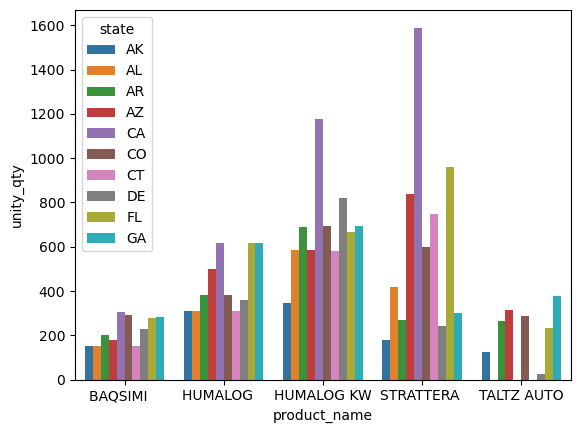

In [90]:
sns.barplot(data = state_wise_top5, x = 'product_name', y = 'unity_qty',hue= 'state' )

<Axes: xlabel='product_name', ylabel='DateINT_mean'>

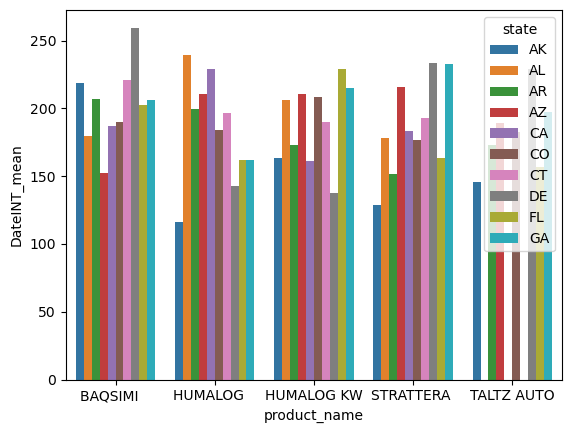

In [91]:
sns.barplot(data = state_wise_top5, x = 'product_name', y = 'DateINT_mean',hue= 'state' )

In [93]:
import plotly.express as px

In [98]:
state_wise_top5 = state_wise_top5.sort_values(by = 'DateINT_mean', ascending=False)

In [99]:
fig = px.bar(x=state_wise_top5['product_name'], y=state_wise_top5['DateINT_mean'], color = state_wise_top5.state)
fig.write_html('first_figure.html', auto_open=True)

<Axes: xlabel='unity_qty', ylabel='DateINT_mean'>

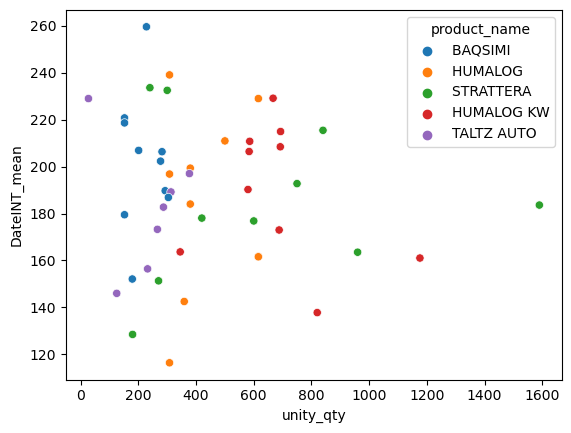

In [100]:
sns.scatterplot(x = state_wise_top5['unity_qty'], y = state_wise_top5['DateINT_mean'], hue = state_wise_top5['product_name'] )

In [107]:
drug_21.isna().sum()

state              0
ndc                0
labeler_code       0
product_code       0
unity_qty          0
DateINT            0
Date               0
product_name       0
CustomerID         0
customer_rating    0
dtype: int64

In [112]:
drug_21[drug_21['product_name']==np.nan]

,state,ndc,labeler_code,product_code,unity_qty,DateINT,Date,product_name,CustomerID,customer_rating


In [134]:
rating_wise_sale = drug_21.groupby('product_name').agg({'unity_qty':'sum',
                                    'customer_rating':'mean'}
                                   ).reset_index().sort_values(by = 'unity_qty', ascending = False)

In [135]:
rating_wise_sale

,product_name,unity_qty,customer_rating
5426,LEVOTHYROX,324427,3.013248
7556,PREGABALIN,314043,3.027243
791,ATORVASTAT,240417,3.017233
524,AMOXICILLI,224277,3.007103
8235,ROSUVASTAT,201903,3.042959
...,...,...,...
5764,Lisianpril,0,3.000000
1283,BPL GABAPE,0,2.900000
5823,MAG SULF /,0,3.440000
10102,Vecuronium,0,5.000000


In [136]:
drug_21.shape

(1048575, 10)

In [137]:
rating_wise_sale['customer_rating'].max()

5.0

In [138]:
rating_wise_sale = rating_wise_sale[rating_wise_sale['unity_qty']!=0]

In [139]:
rating_wise_sale

,product_name,unity_qty,customer_rating
5426,LEVOTHYROX,324427,3.013248
7556,PREGABALIN,314043,3.027243
791,ATORVASTAT,240417,3.017233
524,AMOXICILLI,224277,3.007103
8235,ROSUVASTAT,201903,3.042959
...,...,...,...
5970,METADATE E,1,4.000000
3808,Flavoxate,1,5.000000
4353,HM INF IBU,1,3.000000
1805,CIPRO 500m,1,5.000000


In [140]:
drug_21[drug_21['unity_qty']==0]['product_name'].nunique()

389

In [141]:
drug_21[drug_21['product_name']=='Vecuronium']

,state,ndc,labeler_code,product_code,unity_qty,DateINT,Date,product_name,CustomerID,customer_rating
105500,AL,67457047500,67457,475,0,359,12/25/2021,Vecuronium,52,5


<Axes: xlabel='unity_qty', ylabel='customer_rating'>

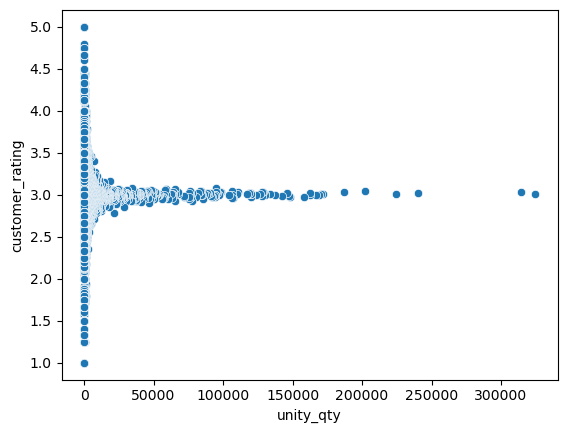

In [147]:
sns.scatterplot(x = rating_wise_sale['unity_qty'], y = rating_wise_sale['customer_rating'])

In [148]:
drug_21.head()

,state,ndc,labeler_code,product_code,unity_qty,DateINT,Date,product_name,CustomerID,customer_rating
0,AK,2143380,2,1433,80,1,1/1/2021,TRULICITY,30,2
1,AK,2143480,2,1434,80,206,7/25/2021,TRULICITY,14,1
2,AK,2143611,2,1436,11,302,10/29/2021,EMGALITY P,4,3
3,AK,2144511,2,1445,11,203,7/22/2021,TALTZ AUTO,7,5
4,AK,2144527,2,1445,27,117,4/27/2021,TALTZ AUTO,24,3


In [20]:
df = drug_21[['CustomerID','product_name','customer_rating']]

In [21]:
drug_21['product_name'].nunique()

10709

In [22]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
df['product_name'] = lbe.fit_transform(df['product_name'])

C:\Users\kavis\AppData\Local\Temp\ipykernel_7548\3643558962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['product_name'] = lbe.fit_transform(df['product_name'])


In [23]:
df['product_name'].head()

0    9505
1    9505
2    3042
3    9076
4    9076
Name: product_name, dtype: int32

In [24]:
# df = df.drop_duplicates(subset  = 'CustomerID')

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_absolute_error

In [160]:
X = df.copy()
y = df['CustomerID']

skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)
print(skf)

i=1
for train_index, test_index in skf.split(X, y):
    print("\nFold: ",i)
    print("TRAIN:", train_index, " having: ", len(train_index) )
    print("TEST:", test_index, " having: ", len(test_index) )  
    #print(X.loc[train_index])
    for train_index, test_index in skf.split(X, y):
        X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[train_index], y.loc[test_index], y.loc[test_index]
    
    i+=1
    print("------------------------------------")

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

Fold:  1
TRAIN: [   7539    7541    7615 ... 1048572 1048573 1048574]  having:  838860
TEST: [      0       1       2 ... 1026252 1026275 1026320]  having:  209715
------------------------------------

Fold:  2
TRAIN: [      0       1       2 ... 1048572 1048573 1048574]  having:  838860
TEST: [   7539    7541    7615 ... 1032056 1032082 1032084]  having:  209715
------------------------------------

Fold:  3
TRAIN: [      0       1       2 ... 1048572 1048573 1048574]  having:  838860
TEST: [  15644   15663   15666 ... 1037693 1037707 1037741]  having:  209715
------------------------------------

Fold:  4
TRAIN: [      0       1       2 ... 1048572 1048573 1048574]  having:  838860
TEST: [  24701   24741   24770 ... 1043300 1043316 1043320]  having:  209715
------------------------------------

Fold:  5
TRAIN: [      0       1       2 ... 1043300 1043316 1043320]  having:  838860
TEST: [  33444   33455   33504 ... 1048572

In [162]:
df.columns

Index(['CustomerID', 'product_name', 'customer_rating'], dtype='object')

In [199]:
X_train.groupby(['CustomerID','product_name'])['customer_rating'].first().unstack()

product_name,0,1,2,3,4,5,6,7,8,9,...,10699,10700,10701,10702,10703,10704,10705,10706,10707,10708
CustomerID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
# ratings matrix
# df_ratings = pd.pivot(X_train, index=['CustomerID'], columns='product_name', values='customer_rating')  #sparse dataframe
df_ratings = X_train.groupby(['CustomerID','product_name'])['customer_rating'].first().unstack()
df_ratings2 = df_ratings.copy().fillna(0) #fill nan by zeros

# user-user similarity matrix
similarity_matrix = cosine_similarity(df_ratings2, df_ratings2)  #similarity matrix
similarity_matrix_df = pd.DataFrame(similarity_matrix, index=df_ratings.index, columns=df_ratings.index)  #dataframe
similarity_matrix_df

# # item-item similarity matrix
# similarity_matrix = cosine_similarity(df_ratings2.T, df_ratings2.T)  #similarity matrix
# similarity_matrix_df = pd.DataFrame(similarity_matrix, index=df_ratings.T.index, columns=df_ratings.T.index)  #dataframe
# similarity_matrix_df

CustomerID,1,2,3,4,5,6,7,8,9,10,...,511,512,513,514,515,516,517,518,519,520
CustomerID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.457808,0.456430,0.435858,0.451587,0.448687,0.429133,0.438662,0.454986,0.433684,...,0.337444,0.368537,0.344057,0.319206,0.329328,0.320339,0.307759,0.316945,0.335784,0.309914
2,0.457808,1.000000,0.397624,0.421124,0.444954,0.448398,0.423892,0.418751,0.451219,0.427714,...,0.267980,0.329572,0.334207,0.302449,0.338342,0.334256,0.302225,0.330629,0.351963,0.303778
3,0.456430,0.397624,1.000000,0.394926,0.447220,0.413585,0.451427,0.396781,0.420454,0.431355,...,0.324924,0.351823,0.347838,0.307402,0.336244,0.308003,0.324703,0.289464,0.332447,0.299097
4,0.435858,0.421124,0.394926,1.000000,0.432191,0.429417,0.416981,0.411131,0.444710,0.406010,...,0.327864,0.334813,0.371732,0.324289,0.318904,0.362502,0.315809,0.328271,0.342689,0.303699
5,0.451587,0.444954,0.447220,0.432191,1.000000,0.415255,0.421426,0.440637,0.442323,0.420877,...,0.308155,0.337338,0.339226,0.306415,0.328148,0.293501,0.299537,0.316191,0.334942,0.328581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,0.320339,0.334256,0.308003,0.362502,0.293501,0.327998,0.310295,0.313128,0.349125,0.346250,...,0.335397,0.353202,0.317759,0.350664,0.372828,1.000000,0.314197,0.313770,0.342945,0.320624
517,0.307759,0.302225,0.324703,0.315809,0.299537,0.303604,0.311661,0.286918,0.301740,0.328079,...,0.337088,0.351612,0.347403,0.330429,0.329741,0.314197,1.000000,0.324831,0.351093,0.339102
518,0.316945,0.330629,0.289464,0.328271,0.316191,0.323427,0.322624,0.319903,0.317279,0.282215,...,0.331928,0.356024,0.308173,0.323582,0.331666,0.313770,0.324831,1.000000,0.356612,0.340454


## User - Based

In [204]:
#function to predict ratings

def calculate_ratings(id_movie, id_user, similarity_threshold):
    if id_movie in df_ratings:
        cosine_scores = similarity_matrix_df[id_user] #similarity of id_user with every other user
        ratings_scores = df_ratings[id_movie]      #ratings of every other user for the movie id_movie
        
        #selecting nearest neighbour above the function defined threshold parameter
        index_below_threshold = cosine_scores[cosine_scores<similarity_threshold].index
#         print(index_below_threshold)
        ratings_scores=ratings_scores.drop(index_below_threshold)
        cosine_scores=cosine_scores.drop(index_below_threshold)
    
        #won't consider users who haven't rated id_movie so drop similarity scores and ratings corresponsing to np.nan
        index_not_rated = ratings_scores[ratings_scores.isnull()].index
        
        ratings_scores = ratings_scores.dropna()
        cosine_scores = cosine_scores.drop(index_not_rated)
        
        #calculating rating by weighted mean of ratings and cosine scores of the users who have rated the movie
        if np.dot(ratings_scores, cosine_scores)==0 or np.isnan(np.dot(ratings_scores, cosine_scores)):    #when dot product of ratings and cosine scores is 0 or null
            return 2.5
        else:
            ratings_movie = np.dot(ratings_scores, cosine_scores)/cosine_scores.sum()
            return ratings_movie
    else:
        return 2.5


In [169]:
#evaluates mae on test set

def eval_test_data(X_test, threshold):
    user_movie_pairs = zip(X_test['product_name'], X_test['CustomerID'])
    predicted_ratings = np.array([calculate_ratings(movie, user,threshold) for (movie,user) in user_movie_pairs])
    true_ratings = np.array(X_test['customer_rating'])
    score = mean_absolute_error(true_ratings, predicted_ratings)
    return score
    #return user_movie_pairs,predicted_ratings, true_ratings

In [170]:
i=1
a=[]  #to store MAE of each fold
print("USER BASED APPROACH\n")
print("Mean Absolute Errors\n")
for train_index, test_index in skf.split(X, y):
    X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[train_index], y.loc[test_index], y.loc[test_index]
    
#     df_ratings = X_train.pivot(index='CustomerID', columns='product_name', values='customer_rating')  #sparse dataframe

    df_ratings = X_train.groupby(['CustomerID','product_name'])['customer_rating'].first().unstack()
    df_ratings2 = df_ratings.copy().fillna(0) #fill nan by zeros
    similarity_matrix = cosine_similarity(df_ratings2, df_ratings2)  #similarity matrix
    similarity_matrix_df = pd.DataFrame(similarity_matrix, index=df_ratings.index, columns=df_ratings.index)  #dataframe
    
    e=eval_test_data(X_test, threshold=0.4)
    a.append(e)
    print("Fold ", i, ": ", e)  #calling eval_test_data() function to get MAE for each fold
    
    i+=1

print("Average MAE: ", np.average(a))

USER BASED APPROACH

Mean Absolute Errors

Fold  1 :  1.0890557259484328
Fold  2 :  1.0883579846684814
Fold  3 :  1.0884783827213815
Fold  4 :  1.093393169944719
Fold  5 :  1.1207990779313843
Average MAE:  1.0960168682428797


## Get User Based Recommendations 

In [192]:
df.iloc[3]

CustomerID            7
product_name       9076
customer_rating       5
Name: 3, dtype: int64

In [205]:
calculate_ratings(9076, 7, 3)

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            511, 512, 513, 514, 515, 516, 517, 518, 519, 520],
           dtype='int64', name='CustomerID', length=480)


2.5

In [195]:
similarity_matrix_df

product_name,0,1,2,3,4,5,6,7,8,9,...,10699,10700,10701,10702,10703,10704,10705,10706,10707,10708
product_name,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
1,0.0,1.000000,0.040656,0.042289,0.061354,0.233550,0.047913,0.107872,0.251752,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.389249,0.0,0.000000,0.000000
2,0.0,0.040656,1.000000,0.015760,0.000000,0.000000,0.000000,0.080403,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
3,0.0,0.042289,0.015760,1.000000,0.135569,0.000000,0.278604,0.135904,0.117110,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.083633,0.000000
4,0.0,0.061354,0.000000,0.135569,1.000000,0.047287,0.097010,0.091003,0.248488,0.052541,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10704,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.000000
10705,0.0,0.389249,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.000000
10706,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.346410,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.000000


In [194]:
df_ratings

CustomerID,1,2,3,4,5,6,7,8,9,10,...,511,512,513,514,515,516,517,518,519,520
product_name,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
drug_21.columns

Index(['state', 'ndc', 'labeler_code', 'product_code', 'unity_qty', 'DateINT',
       'Date', 'product_name', 'CustomerID', 'customer_rating'],
      dtype='object')

In [213]:
df.head()

,CustomerID,product_name,customer_rating
0,30,9505,2
1,14,9505,1
2,4,3042,3
3,7,9076,5
4,24,9076,3


In [25]:
df.shape

(1048575, 3)

In [26]:
df['CustomerID'].nunique()

480

In [27]:
df['product_name'].nunique()

10709

In [48]:
df.columns

Index(['CustomerID', 'product_name', 'customer_rating'], dtype='object')

In [54]:
n_users = df.CustomerID.unique().shape[0]
n_items = df.product_name.unique().shape[0]
max_item_id = df['product_name'].max()
# Adjust n_items to accommodate the maximum product_name
n_items = max(n_items, max_item_id)

A = np.zeros((n_users,n_items))

for line in df.itertuples():
#     A[line[1]-1,line[2]-1] = line[3]
    user_index = line[1] - 1
    item_index = line[2] - 1
    if user_index < n_users and item_index < n_items:
        A[user_index, item_index] = line[3]
    else:
        print(f"Ignore entry with out-of-bounds indices: {line}")

print("Original rating matrix : ",A)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [55]:
n_items, n_users

(10709, 480)

In [56]:
for i in range(len(A)):
    for j in range(len(A[0])):
        if A[i][j]>=3:
            A[i][j]=1
        else:
            A[i][j]=0

In [57]:
from scipy.sparse import csr_matrix
csr_sample = csr_matrix(A)
print(csr_sample)

  (0, 111)	1.0
  (0, 112)	1.0
  (0, 124)	1.0
  (0, 154)	1.0
  (0, 165)	1.0
  (0, 182)	1.0
  (0, 197)	1.0
  (0, 214)	1.0
  (0, 324)	1.0
  (0, 337)	1.0
  (0, 341)	1.0
  (0, 349)	1.0
  (0, 380)	1.0
  (0, 406)	1.0
  (0, 408)	1.0
  (0, 439)	1.0
  (0, 452)	1.0
  (0, 498)	1.0
  (0, 507)	1.0
  (0, 544)	1.0
  (0, 641)	1.0
  (0, 690)	1.0
  (0, 698)	1.0
  (0, 769)	1.0
  (0, 790)	1.0
  :	:
  (479, 9972)	1.0
  (479, 9989)	1.0
  (479, 9997)	1.0
  (479, 10072)	1.0
  (479, 10150)	1.0
  (479, 10162)	1.0
  (479, 10165)	1.0
  (479, 10204)	1.0
  (479, 10256)	1.0
  (479, 10275)	1.0
  (479, 10322)	1.0
  (479, 10339)	1.0
  (479, 10367)	1.0
  (479, 10400)	1.0
  (479, 10423)	1.0
  (479, 10424)	1.0
  (479, 10456)	1.0
  (479, 10473)	1.0
  (479, 10528)	1.0
  (479, 10531)	1.0
  (479, 10557)	1.0
  (479, 10583)	1.0
  (479, 10591)	1.0
  (479, 10606)	1.0
  (479, 10631)	1.0


In [58]:
from sklearn.neighbors import NearestNeighbors

In [59]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=3, n_jobs=-1)
knn.fit(csr_sample)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=3)

In [60]:
df.columns

Index(['CustomerID', 'product_name', 'customer_rating'], dtype='object')

In [38]:
dataset_sort_des = df.sort_values(['CustomerID'], ascending=False)
filter1 = dataset_sort_des[dataset_sort_des['CustomerID'] == 1].product_name
filter1 = filter1.tolist()
filter1 = filter1[:20]
print("Items liked by user: ",filter1)

Items liked by user:  [8935, 2135, 6395, 2476, 1361, 113, 7671, 9822, 6971, 9166, 5949, 6579, 1820, 9164, 3643, 8191, 6139, 6703, 9112, 6049]


In [39]:
# print(csr_sample)

In [62]:
csr_sample.shape

(480, 10709)

In [63]:
# filter1 = [f for f in filter1 if f <480]

In [64]:
distances1=[]
indices1=[]
for i in filter1:
    distances , indices = knn.kneighbors(csr_sample[i], n_neighbors=3)
    indices = indices.flatten()
    indices= indices[1:]
    indices1.extend(indices)


In [65]:
print("Items to be recommended: ",indices1)

Items to be recommended:  [82, 118]


In [66]:
df.iloc[82]

CustomerID           38
product_name       4858
customer_rating       1
Name: 82, dtype: int64

## Sales Prediction

In [67]:
drug_21.head()

,state,ndc,labeler_code,product_code,unity_qty,DateINT,Date,product_name,CustomerID,customer_rating
0,AK,2143380,2,1433,80,1,1/1/2021,TRULICITY,30,2
1,AK,2143480,2,1434,80,206,7/25/2021,TRULICITY,14,1
2,AK,2143611,2,1436,11,302,10/29/2021,EMGALITY P,4,3
3,AK,2144511,2,1445,11,203,7/22/2021,TALTZ AUTO,7,5
4,AK,2144527,2,1445,27,117,4/27/2021,TALTZ AUTO,24,3


In [69]:
drug_21['Date'] = pd.to_datetime(drug_21['Date'])

In [70]:
drug_21['day'] = drug_21['Date'].dt.day
drug_21['month'] = drug_21['Date'].dt.month
drug_21['year'] = drug_21['Date'].dt.year

In [72]:
drug_21['quarter'] = drug_21['Date'].dt.quarter

In [73]:
drug_21.head()

,state,ndc,labeler_code,product_code,unity_qty,DateINT,Date,product_name,CustomerID,customer_rating,day,month,year,quarter
0,AK,2143380,2,1433,80,1,2021-01-01,TRULICITY,30,2,1,1,2021,1
1,AK,2143480,2,1434,80,206,2021-07-25,TRULICITY,14,1,25,7,2021,3
2,AK,2143611,2,1436,11,302,2021-10-29,EMGALITY P,4,3,29,10,2021,4
3,AK,2144511,2,1445,11,203,2021-07-22,TALTZ AUTO,7,5,22,7,2021,3
4,AK,2144527,2,1445,27,117,2021-04-27,TALTZ AUTO,24,3,27,4,2021,2


In [74]:
drug_21.shape

(1048575, 14)

In [93]:
month_wise_product_units = drug_21.groupby(['product_name','month'])['unity_qty'].sum().reset_index(name = 'monthly_counts').sort_values(by = 'monthly_counts', ascending = False)

In [94]:
month_wise_product_units

,product_name,month,monthly_counts
38481,LEVOTHYROX,8,28887
38485,LEVOTHYROX,12,28767
53732,PREGABALIN,9,27963
38476,LEVOTHYROX,3,27934
53731,PREGABALIN,8,27616
...,...,...,...
57810,REVLIMID L,6,0
57811,REVLIMID L,7,0
57812,REVLIMID L,8,0
57813,REVLIMID L,9,0


In [102]:
pd.options.display.max_rows = 2000

In [98]:
month_state_wise_product_units = drug_21.groupby(['product_name','state','month'])['unity_qty'].sum().reset_index(name = 'monthly_counts').sort_values(by = 'monthly_counts', ascending = False)

In [103]:
month_state_wise_product_units

,product_name,state,month,monthly_counts
159509,PREGABALIN,CA,6,4986
159510,PREGABALIN,CA,7,4707
159513,PREGABALIN,CA,10,4699
113911,LEVOTHYROX,CA,4,4527
113913,LEVOTHYROX,CA,6,4518
...,...,...,...,...
50872,DDAVP 0.1m,CT,7,0
202231,TopCare Cl,CT,9,0
50871,DDAVP 0.1M,CT,10,0
50870,DDAVP 0.1M,CT,8,0


In [6]:
drug_21 = pd.read_csv('StateDrugUtilization2021/StateDrugUtilization2021.csv')
drug_22 = pd.read_csv('StateDrugUtilization2022/StateDrugUtilization2022.csv')
drug_23 = pd.read_csv('StateDrugUtilization2023/StateDrugUtilization2023.csv')

In [7]:
drug_21_22 = pd.concat([drug_21, drug_22])

In [8]:
drugs = pd.concat([drug_21_22, drug_23])

In [9]:
drugs.head()

,state,ndc,labeler_code,product_code,unity_qty,DateINT,Date,product_name,CustomerID,customer_rating
0,AK,2143380,2,1433,80,1,1/1/2021,TRULICITY,30,2
1,AK,2143480,2,1434,80,206,7/25/2021,TRULICITY,14,1
2,AK,2143611,2,1436,11,302,10/29/2021,EMGALITY P,4,3
3,AK,2144511,2,1445,11,203,7/22/2021,TALTZ AUTO,7,5
4,AK,2144527,2,1445,27,117,4/27/2021,TALTZ AUTO,24,3


In [10]:
drugs.tail()

,state,ndc,labeler_code,product_code,unity_qty,DateINT,Date,product_name,CustomerID,customer_rating
1048570,KY,68462038401,68462,384,1,309,11/5/2023,ESZOPICLON,727,1
1048571,KY,68462038502,68462,385,2,354,12/20/2023,MOMETASONE,754,4
1048572,KY,68462038537,68462,385,37,59,2/28/2023,MOMETASONE,724,1
1048573,KY,68462038630,68462,386,30,84,3/25/2023,SOLIFENACI,758,3
1048574,KY,68462038630,68462,386,30,341,12/7/2023,SOLIFENACI,734,4


In [11]:
drugs['Date'] = pd.to_datetime(drugs['Date'])
drugs['year_month'] = drugs['Date'].dt.year.astype(str)+drugs['Date'].dt.month.astype(str)

In [12]:
drugs['year_month'].head()

0     20211
1     20217
2    202110
3     20217
4     20214
Name: year_month, dtype: object

In [13]:
drugs['year_month'] = pd.to_numeric(drugs['year_month'])

In [14]:
drugs['year_month']

0           20211
1           20217
2          202110
3           20217
4           20214
            ...  
1048570    202311
1048571    202312
1048572     20232
1048573     20233
1048574    202312
Name: year_month, Length: 3145725, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
drugs['product_name'] = lbe.fit_transform(drugs['product_name'])

In [18]:
x = drugs[['product_name','year_month']]
y = drugs['unity_qty']

In [19]:
x_trn, x_val, y_trn, y_val = train_test_split(x, y, test_size=0.2)

In [96]:
# from sklearn.tree import DecisionTreeRegressor
# dt = DecisionTreeRegressor()
# dt.fit(x_trn, y_trn)

In [168]:
pred = dt.predict(x_val)

In [169]:
mean_absolute_error(y_val, pred)

16.452487459141306

In [173]:
product_name = 'TRULICITY'

preds = dt.predict([[95,20245]])

D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [174]:
preds

array([31.])

## Recommendation on Time 

In [21]:
drugs.head()

,state,ndc,labeler_code,product_code,unity_qty,DateINT,Date,product_name,CustomerID,customer_rating,year_month
0,AK,2143380,2,1433,80,1,2021-01-01,10740,30,2,20211
1,AK,2143480,2,1434,80,206,2021-07-25,10740,14,1,20217
2,AK,2143611,2,1436,11,302,2021-10-29,3442,4,3,202110
3,AK,2144511,2,1445,11,203,2021-07-22,10255,7,5,20217
4,AK,2144527,2,1445,27,117,2021-04-27,10255,24,3,20214


In [22]:
df  = drugs[['year_month','product_name']]

In [66]:
n_users = df.year_month.unique().shape[0]
n_items = df.product_name.unique().shape[0]
max_item_id = df['product_name'].max()
# Adjust n_items to accommodate the maximum product_name
n_items = max(n_items, max_item_id)

A = np.zeros((n_users,n_items))

for line in df.itertuples():
#     A[line[1]-1,line[2]-1] = line[3]
    print(line)
    user_index = line[0] 
    print(user_index)
    item_index = line[1] 
    print(item_index)
#     if user_index < n_users and item_index < n_items:
    A[user_index, item_index] = line[2]
    print(A[user_index, item_index])
#     else:
#         print(f"Ignore entry with out-of-bounds indices: {line}")

print("Original rating matrix : ",A)

Pandas(Index=0, year_month=20211, product_name=10740)
0
20211


IndexError: index 20211 is out of bounds for axis 1 with size 12117

In [47]:
n_items, n_users

(12117, 36)

In [48]:
for i in range(len(A)):
    for j in range(len(A[0])):
        if A[i][j]>=3:
            A[i][j]=1
        else:
            A[i][j]=0

In [60]:
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
from scipy.sparse import csr_matrix
csr_sample = csr_matrix(A)

In [67]:
df.head()

,year_month,product_name
0,20211,10740
1,20217,10740
2,202110,3442
3,20217,10255
4,20214,10255


In [70]:
df = df.reset_index()

In [71]:
df.head()

,index,year_month,product_name
0,0,20211,10740
1,1,20217,10740
2,2,202110,3442
3,3,20217,10255
4,4,20214,10255


In [72]:
csr_sample_df = df.pivot(index='index',columns='year_month', values='product_name')

In [73]:
csr_sample_df.head()

year_month,20211,20212,20213,20214,20215,20216,20217,20218,20219,20221,...,20239,202110,202111,202112,202210,202211,202212,202310,202311,202312
index,,,,,,,,,,,,,,,,,,,,,
0,10740.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,10740.0,NaN,NaN,NaN,...,10740.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3442.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3442.0
3,NaN,NaN,NaN,NaN,NaN,NaN,10255.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,10255.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10255.0,NaN


In [75]:
csr_sample_df = csr_sample_df.fillna(0)

In [76]:
from sklearn.neighbors import NearestNeighbors

In [77]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=3, n_jobs=-1)
knn.fit(csr_sample_df)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=3)

In [78]:
df.columns

Index(['index', 'year_month', 'product_name'], dtype='object')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145725 entries, 0 to 3145724
Data columns (total 3 columns):
 #   Column        Dtype
---  ------        -----
 0   index         int64
 1   year_month    int64
 2   product_name  int32
dtypes: int32(1), int64(2)
memory usage: 60.0 MB


In [80]:
dataset_sort_des = df.sort_values(['year_month'], ascending=False)
filter1 = dataset_sort_des[dataset_sort_des['year_month'] == 20211].product_name
filter1 = filter1.tolist()
filter1 = filter1[:20]
print("Items purchased in ym: ",filter1)

Items purchased in ym:  [5282, 6183, 2173, 11146, 8462, 6890, 11946, 4332, 6035, 322, 437, 7950, 6945, 5322, 10293, 4033, 2981, 10612, 8041, 8660]


In [81]:
# print(csr_sample)

In [83]:
csr_sample_df.head()

year_month,20211,20212,20213,20214,20215,20216,20217,20218,20219,20221,...,20239,202110,202111,202112,202210,202211,202212,202310,202311,202312
index,,,,,,,,,,,,,,,,,,,,,
0,10740.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,10740.0,0.0,0.0,0.0,...,10740.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3442.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3442.0
3,0.0,0.0,0.0,0.0,0.0,0.0,10255.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,10255.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10255.0,0.0


In [34]:
# filter1 = [f for f in filter1 if f <480]

In [90]:
csr_sample_df.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            1048565, 1048566, 1048567, 1048568, 1048569, 1048570, 1048571,
            1048572, 1048573, 1048574],
           dtype='int64', name='index', length=1048575)

In [91]:
distances1=[]
indices1=[]
for i in filter1:
    distances , indices = knn.kneighbors(csr_sample_df[csr_sample_df.index==i], n_neighbors=3)
    indices = indices.flatten()
    indices= indices[1:]
    indices1.extend(indices)


In [92]:
print("Items to be recommended: ",indices1)

Items to be recommended:  [863582, 785024, 296907, 748369, 154368, 315504, 22989, 1002057, 1003622, 857143, 487671, 850718, 398128, 599383, 477517, 691689, 922396, 91738, 539659, 961480, 742015, 1047455, 63760, 915127, 233184, 780083, 814797, 60123, 719782, 669647, 724252, 800410, 859315, 129699, 168999, 357574, 52200, 64658, 1016327, 42009]


In [93]:
df.iloc[863582]

index           863582
year_month      202110
product_name      3757
Name: 863582, dtype: int64

In [95]:
df.iloc[1016327]

index           1016327
year_month        20216
product_name       2937
Name: 1016327, dtype: int64